# KNN Regressor
## Daten einlesen

In [1]:
import os

import pandas as pd

from src.dataPipeline import DataPipeline

os.chdir('..')

In [2]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)
#imputer = SimpleImputer(strategy='mean')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, basic_house_imputer=True, imputer=imputer)
#df_kaggle = dp.prepare_kaggle_dataset(filePath='./data/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=True, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:45: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:72: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [3]:
#from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

#pickle_dataframe(df, 'df_with_type.pkl')
#pickle_dataframe(df_kaggle, 'df_kaggle_with_type.pkl')


In [4]:
#from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

#df = unpickle_dataframe('df_with_type.pkl')
#df_kaggle = unpickle_dataframe('df_kaggle_with_type.pkl')

In [5]:
df.head()

,Floor,gde_pop_per_km2,price_cleaned,Space extracted,Plot_area_unified,No. of rooms:,Last refurbishment:,Year built:,Number of floors:,type_unified_attic-room,...,region_group_40,region_group_41,region_group_42,region_group_43,region_group_44,region_group_45,region_group_46,region_group_47,region_group_48,region_group_49
0,0.285714,0.030005,1150000.0,0.021804,0.000000,0.117647,0.94848,0.93984,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.030005,1420000.0,0.034657,0.000633,0.117647,0.99392,0.97760,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.214286,0.136262,720000.0,0.020197,0.000000,0.117647,0.99392,0.99392,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.142857,0.030005,1430000.0,0.034198,0.001054,0.117647,0.98176,0.94272,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.142857,0.040742,995000.0,0.031444,0.000000,0.117647,0.99040,0.96672,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modell erstellen
Der KNN-Regressor ist ein einfach zu implementierendes Modell. Es gibt nur wenige Hyperparameter, die eingestellt und getunet werden müssen. Mit den Anzahl Nachbarn kann man beeinflussen wie stark das Modell generalisiert. Ebenfalls kann mit dem Parameter weights, sagen wie der Einfluss der Nachbarn gestaltet ist.

In [15]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

y = df['price_cleaned']
y_log = np.log(y)

X = df.drop(columns=['price_cleaned'])


train_test_split_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=train_test_split_ratio)


# Initialize KNN Regressor
model = KNeighborsRegressor(n_neighbors=10, weights='distance', p=1)

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

mape_test = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f'Test MAPE: {mape_test:.3f}%')

# Train Mape
y_pred = model.predict(X_train)
y_train = np.exp(y_train)
y_pred = np.exp(y_pred)

mape_train = mean_absolute_percentage_error(y_train, y_pred) * 100

print(f'Train MAPE: {mape_train:.3f}%')

Test MAPE: 37.863%
Train MAPE: 0.317%


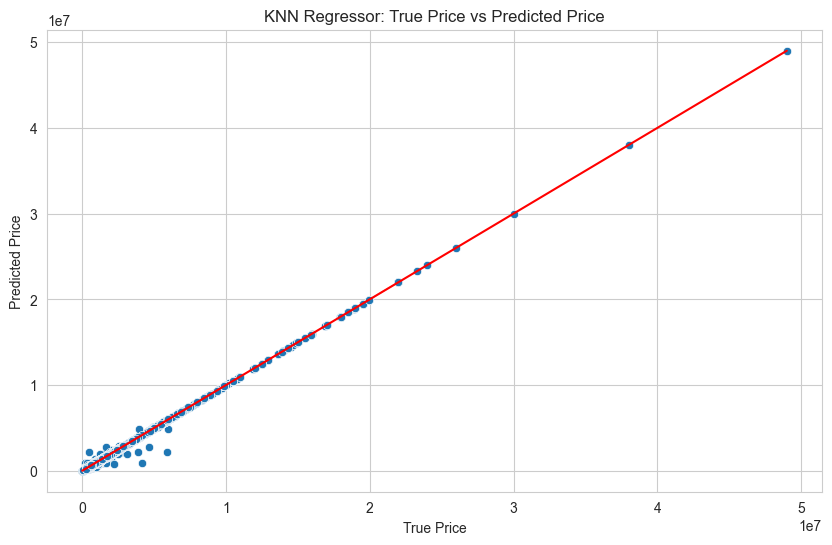

In [9]:
y_pred = np.exp(model.predict(X_train))


# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
sns.lineplot(x=y_train, y=y_train, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

In [10]:
#from src.utils.helperFunctions import create_kaggle_results

#results = model.predict(df_kaggle)
#results = np.exp(results)
#create_kaggle_results(results, csv_name='KNN_Regressor')

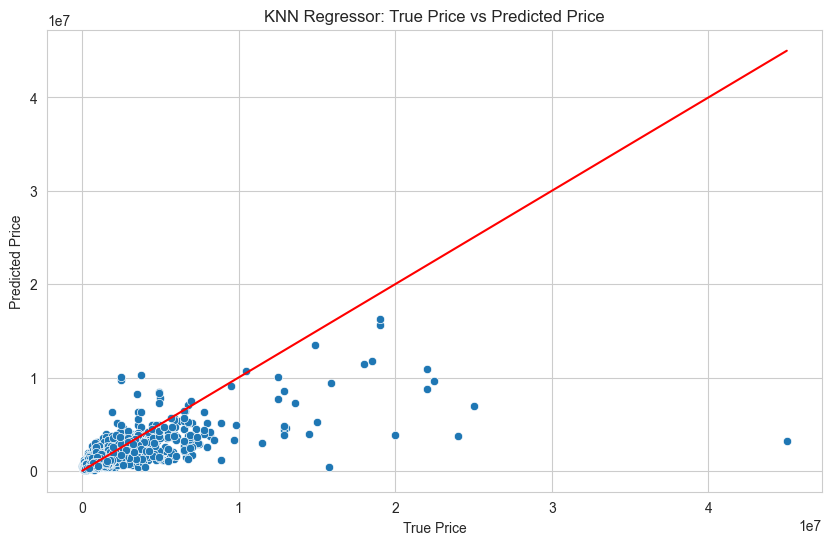

In [11]:
# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

In [12]:
from src.utils.helperFunctions import analyse_highest_errors

error_analysis= analyse_highest_errors(y_test, y_pred, X_test, dp)

In [13]:
error_analysis

,Floor,gde_pop_per_km2,Space extracted,Plot_area_unified,No. of rooms:,Last refurbishment:,Year built:,Number of floors:,type_unified_attic-room,type_unified_castle,...,region_group_44,region_group_45,region_group_46,region_group_47,region_group_48,region_group_49,true_price,predicted_price,error,mape
1511,0.00,306.13,450.00,5635.00,17.00,1989.20,1889.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,295000.00,9773804.16,9478804.16,3213.15
1741,0.00,1492.08,360.00,1600.00,8.00,1987.40,1967.00,3.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,351250.00,4885684.73,4534434.73,1290.94
1349,0.00,841.99,450.00,2237.00,10.00,2013.60,1990.60,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,298000.00,3959893.92,3661893.92,1228.82
3947,0.00,8241.67,583.00,238.00,16.00,2014.80,1832.80,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,370000.00,4715579.38,4345579.38,1174.48
2147,1.60,3330.35,111.00,0.00,5.00,2002.20,1987.80,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,80000.00,885000.00,805000.00,1006.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4113,3.00,250.54,100.00,0.00,4.00,2018.40,2018.40,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,580764.69,NaN,NaN
4114,2.00,336.49,152.00,0.00,5.00,2018.80,1994.80,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,NaN,842727.39,NaN,NaN
4115,5.00,207.65,148.00,0.00,5.00,2016.00,2016.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,682388.08,NaN,NaN
4116,0.00,179.56,94.00,0.00,2.50,2012.40,1995.20,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,513530.29,NaN,NaN


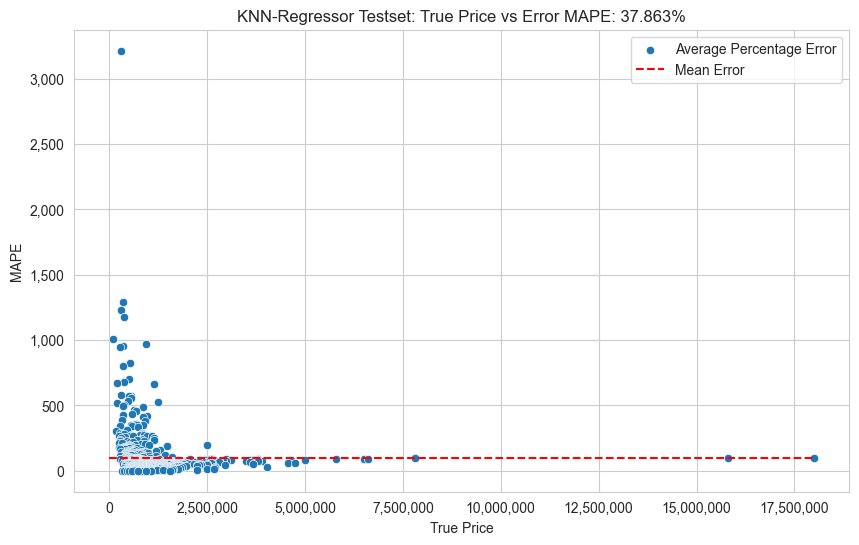

In [17]:
# Plot price vs error
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('MAPE')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title(f'KNN-Regressor Testset: True Price vs Error MAPE: {mape_test:.3f}%')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red', linestyles='dashed')
plt.legend(['Average Percentage Error', 'Mean Error'])
plt.show()

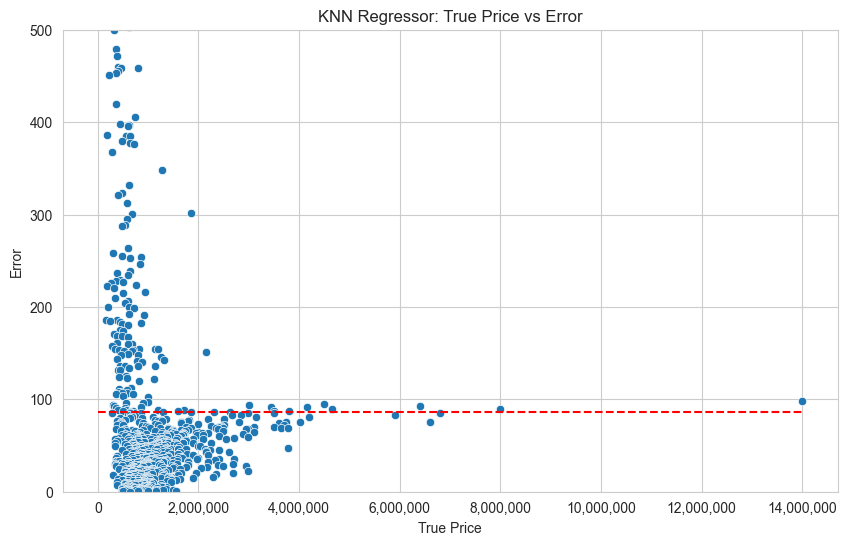

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.ylim(0, 500)
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red', linestyles='dashed')
plt.show()

# KNN with less data

In [1]:
import os

import pandas as pd

from src.dataPipeline import DataPipeline

os.chdir('..')
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)
#imputer = SimpleImputer(strategy='mean')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, basic_house_imputer=True, imputer=imputer)
#df_kaggle = dp.prepare_kaggle_dataset(filePath='./data/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=True, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:44: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
df

,Floor,gde_pop_per_km2,price_cleaned,Space extracted,Plot_area_unified,No. of rooms:,Last refurbishment:,Year built:,Number of floors:,type_unified_attic-room,...,region_group_40,region_group_41,region_group_42,region_group_43,region_group_44,region_group_45,region_group_46,region_group_47,region_group_48,region_group_49
0,2.215607,-0.271610,1150000.0,-0.453177,-0.119858,-0.105105,-0.560377,-0.029596,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
1,-0.667055,-0.271610,1420000.0,-0.015017,-0.062416,-0.105105,0.593227,0.518344,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
2,0.774276,0.565087,720000.0,-0.507947,-0.119858,-0.105105,0.593227,0.755165,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
3,-0.667055,-0.271610,1430000.0,-0.030666,-0.024122,-0.105105,0.284516,0.012196,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
4,-0.667055,-0.187063,995000.0,-0.124557,-0.119858,-0.105105,0.503864,0.360463,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,-0.667055,-0.014015,475000.0,-0.437528,-0.083633,-0.355478,0.585104,-1.594475,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
22477,0.197744,-0.376084,1490000.0,0.720465,-0.119858,1.647509,0.625723,0.773739,2.487128,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
22478,-0.667055,-0.376084,1450000.0,0.642222,-0.002128,1.647509,0.585104,-0.526457,2.487128,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995
22479,0.053611,-0.288187,1290000.0,0.133644,-0.119858,0.145269,0.625723,0.773739,-0.264855,-0.024146,...,-0.141456,-0.125633,-0.135259,-0.098024,-0.149802,-0.210901,-0.150647,-0.038827,-0.156445,-0.121995


In [3]:
#from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

#pickle_dataframe(df, 'df_with_bert_feature.pkl')
#pickle_dataframe(df_kaggle, 'df_kaggle_with_bert_feature.pkl')

DataFrame saved to df_with_bert_feature.pkl.
DataFrame saved to df_kaggle_with_bert_feature.pkl.


In [3]:
#from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

#df = unpickle_dataframe('df_with_bert_feature.pkl')
#df_kaggle = unpickle_dataframe('df_kaggle_with_bert_feature.pkl')

DataFrame loaded from df_with_bert_feature.pkl.
DataFrame loaded from df_kaggle_with_bert_feature.pkl.


## Modell erstellen
Gleiche Parameter wie oben. Wir veruschen aber die Stabilität zu überprüfen, indem wir das Modell mehrmals mit zufälligen Splits trainieren und testen.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

y = df['price_cleaned']
y_log = np.log(y)

X = df.drop(columns=['price_cleaned'])
mapes_train = []
mapes_test = []

for i in range(1, 10):
    train_test_split_ratio = 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=train_test_split_ratio)
    
    
    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=10, weights='distance', p=1)  # Use 5 neighbors
    
    # Train the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    y_test = np.exp(y_test)
    y_pred = np.exp(y_pred)
    
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mapes_test.append(mape)
    print(f'Test MAPE: {mape:.3f}%')
    
    # Train Mape
    y_pred = model.predict(X_train)
    y_train = np.exp(y_train)
    y_pred = np.exp(y_pred)
    
    mape = mean_absolute_percentage_error(y_train, y_pred) * 100
    mapes_train.append(mape)
    print(f'Train MAPE: {mape:.3f}%')

print(f'Mean Test MAPE: {np.mean(mapes_test):.3f}%')    
print(f'Mean Train MAPE: {np.mean(mapes_train):.3f}%')


Test MAPE: 37.068%
Train MAPE: 0.374%
Test MAPE: 35.267%
Train MAPE: 0.339%
Test MAPE: 38.109%
Train MAPE: 0.400%
Test MAPE: 35.848%
Train MAPE: 0.331%
Test MAPE: 33.137%
Train MAPE: 0.322%
Test MAPE: 38.483%
Train MAPE: 0.353%
Test MAPE: 31.807%
Train MAPE: 0.381%
Test MAPE: 34.619%
Train MAPE: 0.356%
Test MAPE: 35.015%
Train MAPE: 0.335%
Mean Test MAPE: 35.484%
Mean Train MAPE: 0.355%


In [82]:
#from src.utils.helperFunctions import create_kaggle_results

#results = model.predict(df_kaggle)
#results = np.exp(results)
#create_kaggle_results(results, csv_name='KNN_Regressor')

File KNN_Regressor_2024-12-26_12-31-20.csv created successfully.


C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\utils\helperFunctions.py:13: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,104,111,112,115,116,117,120,121,122,124,127,128,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  indexes = pd.read_csv(path_to_kaggledata)['Unnamed: 0']


## Fehler Analyse
Vorhersagen auf den Trainingsdaten zeigen einen grossen Overfit.

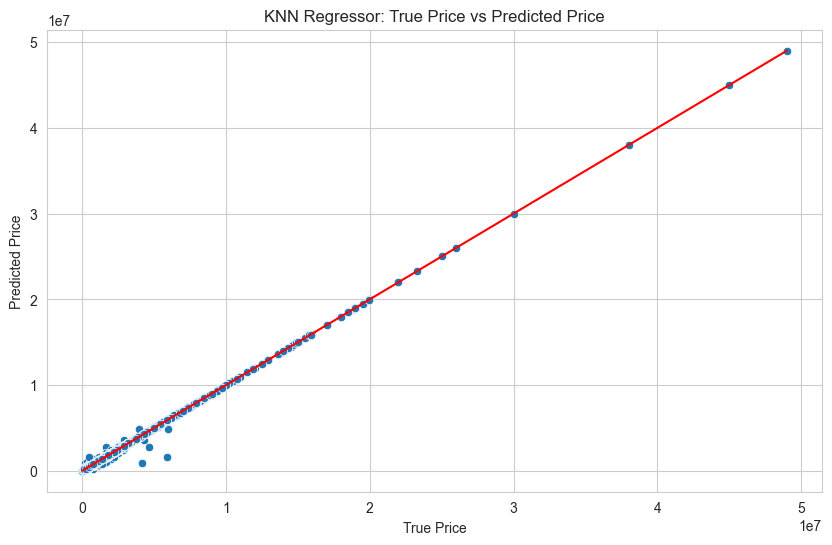

In [4]:
y_pred = np.exp(model.predict(X_train))


# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
sns.lineplot(x=y_train, y=y_train, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

Auf den Testdaten sieht es besser weniger Overfitted aus.

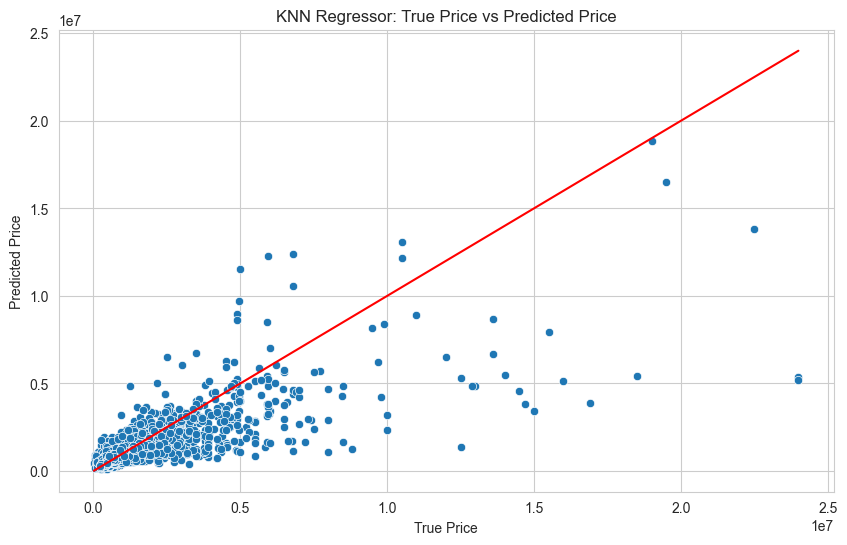

In [5]:
# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

Die grössten Fehler befinden sich bei den günstigsten Immobilien.

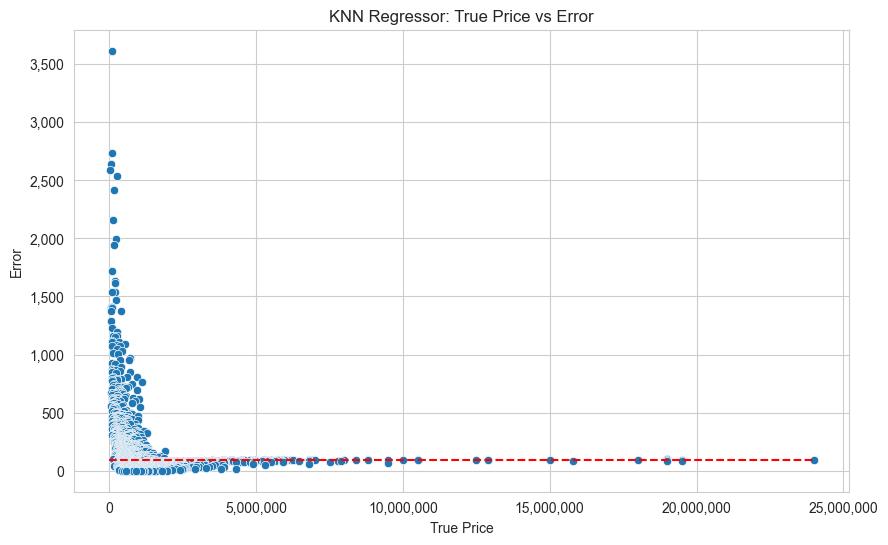

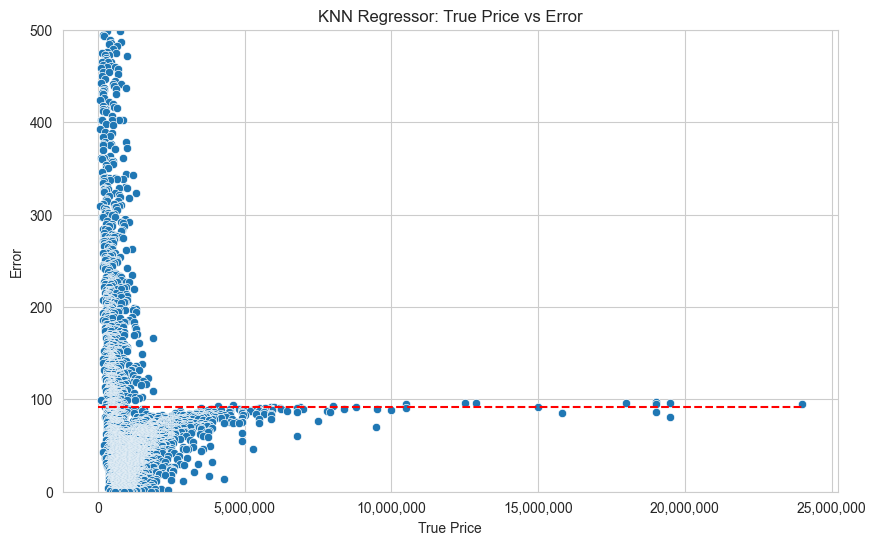

In [7]:
from src.utils.helperFunctions import analyse_highest_errors

error_analysis = analyse_highest_errors(y_test, y_pred, X_test, dp)
error_analysis
# Plot price vs error
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red',
           linestyles='dashed')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.ylim(0, 500)
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red',
           linestyles='dashed')
plt.show()